In [1]:
import pandas as pd
import xlrd
import numpy as np

file = 'repetitors_1.xlsx'
df = pd.concat(pd.read_excel(file, sheet_name=None), ignore_index=True)
# загружаем бд из excle файла в pandas.DataFrame и конкатенируем страницы

df_modified = df.drop(
    ['Column1', 'author', 'date', 'id', 'reply', 'text', 'tutorlink',
     'tutorname'], axis=1)
# drop([a, b, ...]) удаляет столбцы/строки с соответствующими метками

mark_dict = {
    'лучше не бывает!': 10,
    'отлично': 9,
    'почти отлично': 8,
    'вполне хорошо': 7,
    'хорошо': 6,
    'почти хорошо': 5,
    'более-менее': 4,
    'так себе...': 3,
    'плохо': 2,
    'ужасно': 1
}

df_modified = df_modified.replace({"mark": mark_dict}).dropna()
# Когда dict используется в качестве значения to_replace:
# Ключи в словаре - это часть to_replace, а значение в солваре - это параметр value.
# dropna() Удаляет отсутствующие значения.

discipline_dict = {}
index = 1
for discipline in df_modified['discipline'].unique():
    # проверяем на уникальность каждый элемент из столбца discipline
    discipline_dict[discipline] = index
    index += 1
    # даем каждому уникальному элементу свой индекс

df_modified = df_modified.replace({"discipline": discipline_dict})
# заменяем элементы на их численные эквиваленты

array = df_modified.to_numpy()
# переводим pandas.DataFrame(таблицу) в numpy(список)

In [2]:
arr = array[::500]
arra = array[::200]

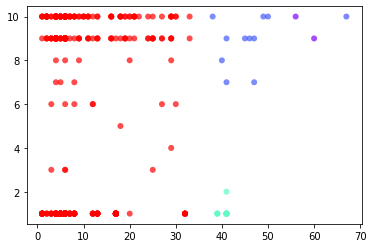

In [3]:
# agglomerative clustering, метод одиночной связи

def distance_function(x, point_list):
    return ((point_list[x[0]][0] - point_list[x[1]][0]) ** 2 + (point_list[x[0]][1] - point_list[x[1]][1]) ** 2) ** .5
# функци поиска расстояния принимает пару индексов точек и сам список точек
# возращает расстояние между двумя точками

def AgglomerativeClustering(point_list, n):
    # создаем все возможные пары точек
    length_list = []
    for i in range(len(point_list)):
        for j in range(i + 1, len(point_list)):
    # j = i+1, чтобы не было пары [i, i]
            length_list.append([i, j])

    # сортировка пар точек по увеличеню расстояния
    length_list = sorted(length_list, key=lambda x: distance_function(x, point_list))

    # 1 шаг алгоритма: все точки отправляем в собственный кластер
    point_cluster = dict()
    for i in range(len(point_list)):
        point_cluster[i] = i
        
    # шаги алгоритма кластеризации
    i = 0
    counter = 0
    while len(point_list) - counter > n:
        a = point_cluster[length_list[i][0]]
        b = point_cluster[length_list[i][1]]
        if a != b:
            for elem in point_cluster:
                if point_cluster[elem] == b:
                    point_cluster[elem] = a
            counter += 1
        i += 1
    return point_cluster

# вывод полученных данных
cluster_list = AgglomerativeClustering(arr, 5)

clusters = list()
for i in range(len(arr)):
    clusters.append(cluster_list[i])

from matplotlib import pyplot as plt
plt.scatter(arr[:,0], arr[:,1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='')
plt.show()

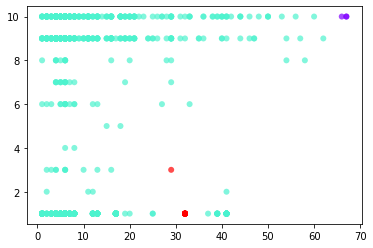

In [4]:
cluster_list = AgglomerativeClustering(arra, 5)
clusters = list()
for i in range(len(arra)):
    clusters.append(cluster_list[i])

from matplotlib import pyplot as plt
plt.scatter(arra[:,0], arra[:,1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='')
plt.show()

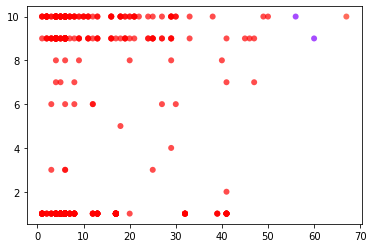

In [5]:
cluster_list = AgglomerativeClustering(arr, 3)
clusters = list()
for i in range(len(arr)):
    clusters.append(cluster_list[i])

from matplotlib import pyplot as plt
plt.scatter(arr[:,0], arr[:,1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='')
plt.show()

In [68]:
ar = np.array([[0, 0],[0,1],[1,0],[10,10], [10,11], [11,11]])
#ar = np.array([[0, 1],[2,1], [0,0]])

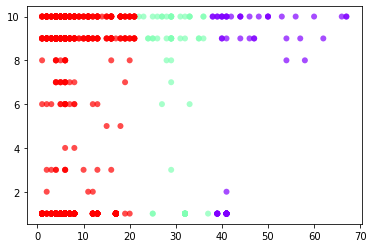

In [22]:
def Spectral_cluster(point_list, n):
    
    # создаем матрицу схожести
    adjacency_matrix = np.zeros((len(point_list), len(point_list)))
    for i in range(len(point_list)):
        for j in range(len(point_list)):
            adjacency_matrix[i][j] = distance_function([i, j], point_list)
    
    maximum = np.amax(adjacency_matrix)
    adjacency_matrix = -adjacency_matrix
    
    B = np.zeros((len(point_list), len(point_list)))
    for i in range(len(point_list)):
        for j in range(len(point_list)):
            if (i != j):
                B[i][j] = maximum

    adjacency_matrix = adjacency_matrix + B
    
    # строим матрицу Лапласа равную диагональная матрица - матрица схожести
    # строим диагональную матрицу:
    # [i][i] = сумме всех элементов в i-ом ряду матрицы схлжести, остальные ноль
    diagonal_matrix = np.zeros((len(point_list), len(point_list)))
    for i in range(len(point_list)):
        for j in range(len(point_list)):
            diagonal_matrix[i][i] += adjacency_matrix[i][j]
    # находим матрицу Лапласа
    laplas_matrix = diagonal_matrix - adjacency_matrix
    
    # находим собственные значения и собственные вектора
    # воспользуемся встроеным в numpy алгоритмом
    w,v = np.linalg.eig(laplas_matrix)
    # w – собственные значения (спектр матрицы)
    # v - собственные вектора
    # сортируем массив собственных значений, чем меньше собственное значение тем лучше получится разбиение
    sorted_w = []

    for i in range(len(point_list)):
        sorted_w.append(i)
    sorted_w = sorted(sorted_w, key=lambda x: w[x])
    
    # создаем словарь, где отмечаем какомы кластеру принадлежит точка
    point_cluster = dict()
    for i in range(len(point_list)):
        point_cluster[i] = 0
        
    # разбиение на 2 кластера
    for i in range(len(v[:, sorted_w[1]])):
        if v[:, sorted_w[1]][i] >= 0:
            point_cluster[i] = n
    # вывод
    return point_cluster

cluster_list = Spectral_cluster(arra, 100)
clusters = list()

arr = list()
for i in range(len(arra)):
    if cluster_list[i] == 100:
        arr.append(arra[i])
        
cluster_list_two = Spectral_cluster(arr, 200)

j = 0
for i in range(len(arra)):
    if cluster_list[i] == 100:
        if cluster_list_two[j] == 200:
            cluster_list[i] = 200
        j += 1

for i in range(len(arra)):
    clusters.append(cluster_list[i])

from matplotlib import pyplot as plt
plt.scatter(arra[:,0], arra[:,1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='')
plt.show()

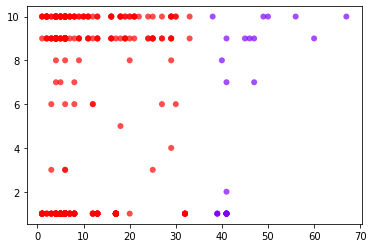

In [16]:
cluster_list = Spectral_cluster(arr, 2)
clusters = list()
for i in range(len(arr)):
    clusters.append(cluster_list[i])

from matplotlib import pyplot as plt
plt.scatter(arr[:,0], arr[:,1], c=clusters, cmap='rainbow', alpha=0.7, edgecolors='')
plt.show()

In [13]:
import numpy as np
test = np.array([[2, -1, 0, 0, -1, 0],[-1, 3, -1, 0, -1, 0], [0, -1, 2, -1, 0, 0],
                 [0, 0, -1, 3, -1, -1], [-1, -1, 0, -1, 3, 0], [0, 0, 0, -1, 0, 1]])
w,v = np.linalg.eig(test)
evals, evecs = np.linalg.eig(test)
    #Assume that the eigenvalues are ordered from large to small and that the
    #eigenvectors are ordered accordingly.
print(evals)
print(evecs[:, 1])
print(evecs)

[-2.22044605e-16  7.21586391e-01  1.68256939e+00  3.00000000e+00
  3.70462437e+00  4.89121985e+00]
[-0.41486979 -0.30944167 -0.0692328   0.22093352 -0.22093352  0.79354426]
[[-0.40824829 -0.41486979 -0.50529469  0.28867513 -0.56702343 -0.03232265]
 [-0.40824829 -0.30944167  0.04026854  0.28867513  0.65812747 -0.46850031]
 [-0.40824829 -0.0692328   0.75901025  0.28867513 -0.20514371  0.35640753]
 [-0.40824829  0.22093352  0.20066454 -0.57735027 -0.30843449 -0.56195221]
 [-0.40824829 -0.22093352 -0.20066454 -0.57735027  0.30843449  0.56195221]
 [-0.40824829  0.79354426 -0.29398409  0.28867513  0.11403968  0.14441544]]


In [ ]:
[-0.40824829 -0.41486979 -0.50529469  0.28867513 -0.56702343 -0.03232265]